In [ ]:
**This is the hw NOTES for section *01_02 Phugoid Oscillation*.**

In [7]:
import numpy 
from matplotlib import pyplot
%matplotlib inline

In [246]:
T = 1000.0
dt = .002
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)

In [247]:
t

array([  0.00000000e+00,   2.00000000e-03,   4.00000000e-03, ...,
         9.99996000e+02,   9.99998000e+02,   1.00000000e+03])

In [248]:
#?numpy.arange()

In [249]:
numpy.arange(0,T+dt,dt)

array([  0.00000000e+00,   2.00000000e-03,   4.00000000e-03, ...,
         9.99996000e+02,   9.99998000e+02,   1.00000000e+03])

In [250]:
# initial conditions
z0 = 100  #altitude (starting value, ?phase shift to sinusoid and changes values)
b0  = 10  #upward velocity resulting from gust
zt = 100  #trim altitude (?mean altiude if sinusoidal)
g  = 9.81 #acceleration due to gravity

u = numpy.array([z0, b0]) #vector array of initial values

# initialize an array to hold the changing elevation values
z = numpy.zeros(N)
z[0] = z0  

In [251]:
u

array([100,  10])

In [252]:
z

array([ 100.,    0.,    0., ...,    0.,    0.,    0.])

In [253]:
# time-loop using Euler's method
for n in range(1,N):
    u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
    z[n] = u[0]

In [254]:
max(z)

135.17693643484219

In [255]:
min(z)

64.788432494516243

In [256]:
from statistics import mean
mean(z)

#the mean should be equal to the zt altitude of trim velocity
#...the closer to the number the more appropriate the delta t is

100.03648296487987

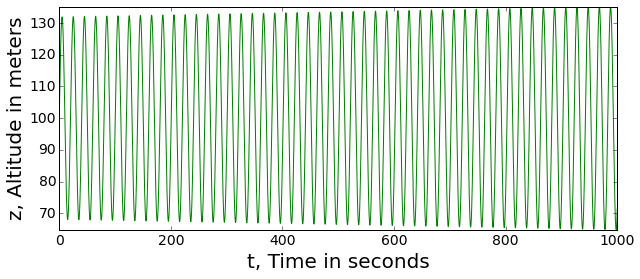

In [257]:
pyplot.figure(figsize=(10,4))   #set plot size
pyplot.ylim(min(z),max(z))             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t, Time in seconds', fontsize=20) #x label
pyplot.ylabel('z, Altitude in meters', fontsize=20) #y label
pyplot.plot(t,z, 'g-');

In [258]:
z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
            (z0-zt)*numpy.cos((g/zt)**.5*t)+zt

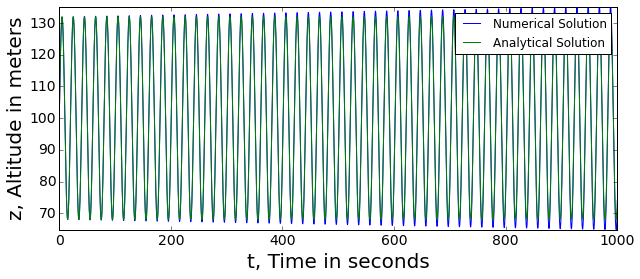

In [259]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(min(z),max(z))             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t, Time in seconds', fontsize=20) #x label
pyplot.ylabel('z, Altitude in meters', fontsize=20) #y label
pyplot.plot(t,z)
pyplot.plot(t, z_exact)
pyplot.legend(['Numerical Solution','Analytical Solution']);

also the solution should converge towards the analytical solution...if this doesnt happen then adjust the delta t to be smaller.

In [261]:
# time-increment array
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

# array that will contain solution of each grid
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1    # number of time-steps
    ### discretize the time using numpy.linspace() ###
    t = numpy.linspace(0.0, T, N)

    # initial conditions
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
    # time loop - Euler method
    for n in range(1,N):
        ### compute next solution using Euler method ###
        u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
        z[n] = u[0]   # store the elevation at time-step n+1
    
    z_values[i] = z.copy()    # store the total elevation calculation grid i

In [263]:
def get_error(z, dt):
    """Returns the error relative to analytical solution using L-1 norm.
    
    Parameters
    ----------
    z : array of float
        numerical solution.
    dt : float
        time increment.
        
    Returns
    -------
    err : float
        L_{1} norm of the error with respect to the exact solution.
    """
    N = len(z)
    t = numpy.linspace(0.0, T, N)
    
    z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
                (z0-zt)*numpy.cos((g/zt)**.5*t)+zt
    
    return dt * numpy.sum(numpy.abs(z-z_exact))

In [269]:
error_values = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    ### call the function get_error() ###
    error_values[i] = get_error(z_values[i], dt)

(0.0001, 0.10000000000000001, 10.0, 1000000.0)

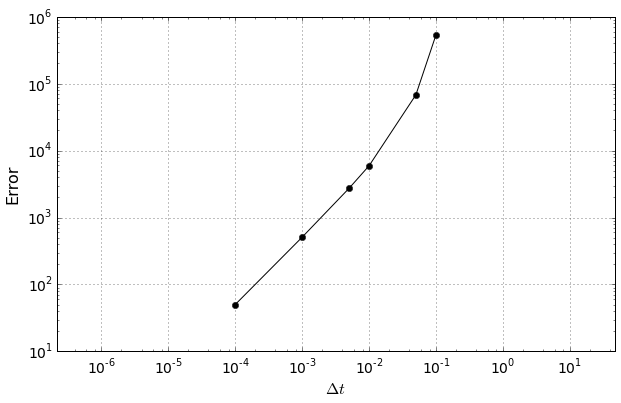

In [272]:
pyplot.figure(figsize=(10, 6))
pyplot.tick_params(axis='both', labelsize=14) #increase tick font size
pyplot.grid(True)                         #turn on grid lines
pyplot.xlabel('$\Delta t$', fontsize=16)  #x label
pyplot.ylabel('Error', fontsize=16)       #y label
pyplot.loglog(dt_values, error_values, 'ko-')  #log-log plot
pyplot.axis('equal')                      #make axes scale equally;

note that the graph above is not linear like the lesson page since the final time T was updated to be 1000 seconds from 100 seconds